# [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
# Find the overall conversion rate of your store.
# Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
dataset = pd.read_csv('2019-Oct.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime,
                     nrows=2000000)

#### Find the overall conversion rate of your store.

In [85]:
num = dataset[dataset.event_type == 'purchase'].groupby([dataset.product_id]).product_id.count().sum()
denom = dataset[dataset.event_type == 'view'].groupby([dataset.product_id]).product_id.count().sum()
overall_conv_rate = num / denom
print(overall_conv_rate)

0.017492252228807355


#### Plot the number of purchases of each category

In [202]:
purchases_dataset = dataset[dataset.event_type == 'purchase']
purchases_dataset = purchases_dataset.dropna(subset=["category_code"])

In [203]:
purchases_dataset.category_code.replace('(?=\.).*','',regex=True, inplace = True)
category_list = purchases_dataset.category_code.unique()

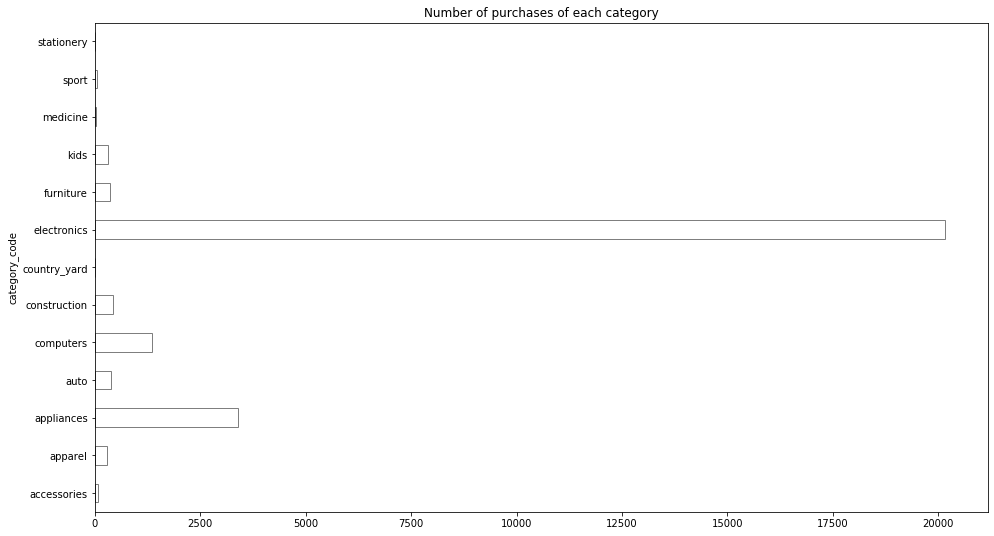

In [204]:
purchases_dataset = purchases_dataset.groupby([purchases_dataset.category_code]).category_code.count()
purchases_dataset.plot.barh(figsize=(16,9),\
                                 title="Number of purchases of each category",\
                                  color="white", edgecolor="black", alpha=0.5)
plt.show()

#### Plot the number of purchases of each category. (plus)

In [205]:
view_dataset = dataset[dataset.event_type == 'view']
view_dataset = view_dataset.dropna(subset=["category_code"])

In [206]:
view_dataset.category_code.replace('(?=\.).*','',regex=True, inplace = True)

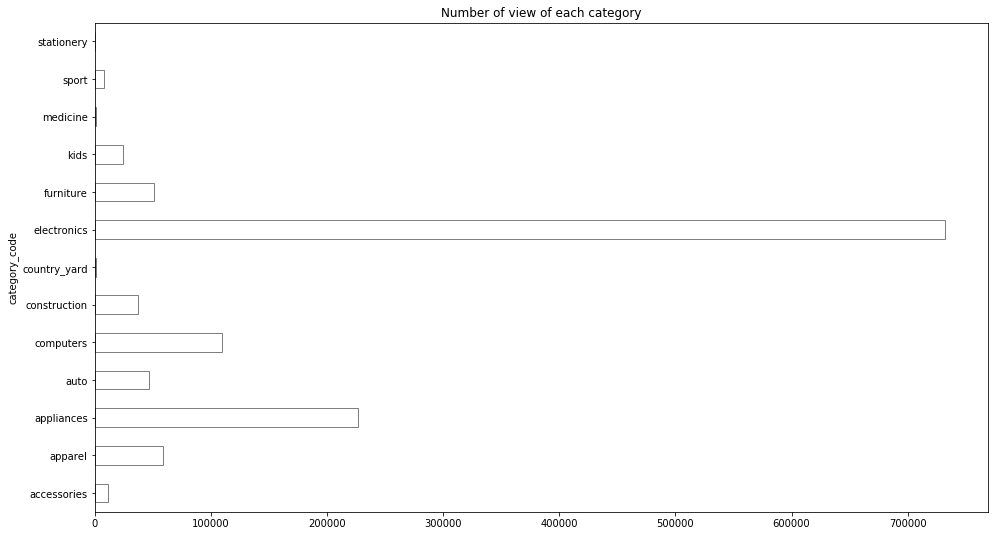

In [207]:
view_dataset = view_dataset.groupby([view_dataset.category_code]).category_code.count()
view_dataset.plot.barh(figsize=(16,9),\
                                 title="Number of view of each category",\
                                  color="white", edgecolor="black", alpha=0.5)
plt.show()

#### show the conversion rate of each category in decreasing order.

In [215]:
def conversion_rate(zip_list):
    return zip_list[0]/zip_list[1]

zip_conversion_rate = zip(category_list, map(conversion_rate , zip(purchases_dataset, view_dataset)))
zip_conversion_rate = sorted(zip_conversion_rate, key = lambda t: t[1], reverse=True)
for i in zip_conversion_rate:
    print(i)

('medicine', 0.029069767441860465)
('accessories', 0.027531180516479375)
('appliances', 0.01493715545755237)
('kids', 0.012460555061089085)
('computers', 0.012288800496296026)
('construction', 0.011251833088921477)
('country_yard', 0.0111731843575419)
('auto', 0.008019688547545296)
('apparel', 0.007106598984771574)
('stationery', 0.0069786535303776685)
('electronics', 0.006389224658953549)
('sport', 0.005391804457225018)
('furniture', 0.004874817406665081)
